## Image Processing using SimpleITK

### Clear scene and load sample data set using SimpleITK

In [1]:
import SimpleITK as sitk
import sitkUtils as su

# Clear scene
slicer.mrmlScene.Clear(False)

# Load 3D image using SimpleITK
reader = sitk.ImageFileReader()
reader.SetFileName("Data/MRBrainTumor1.nrrd")
image = reader.Execute();

### Display SimpleITK image

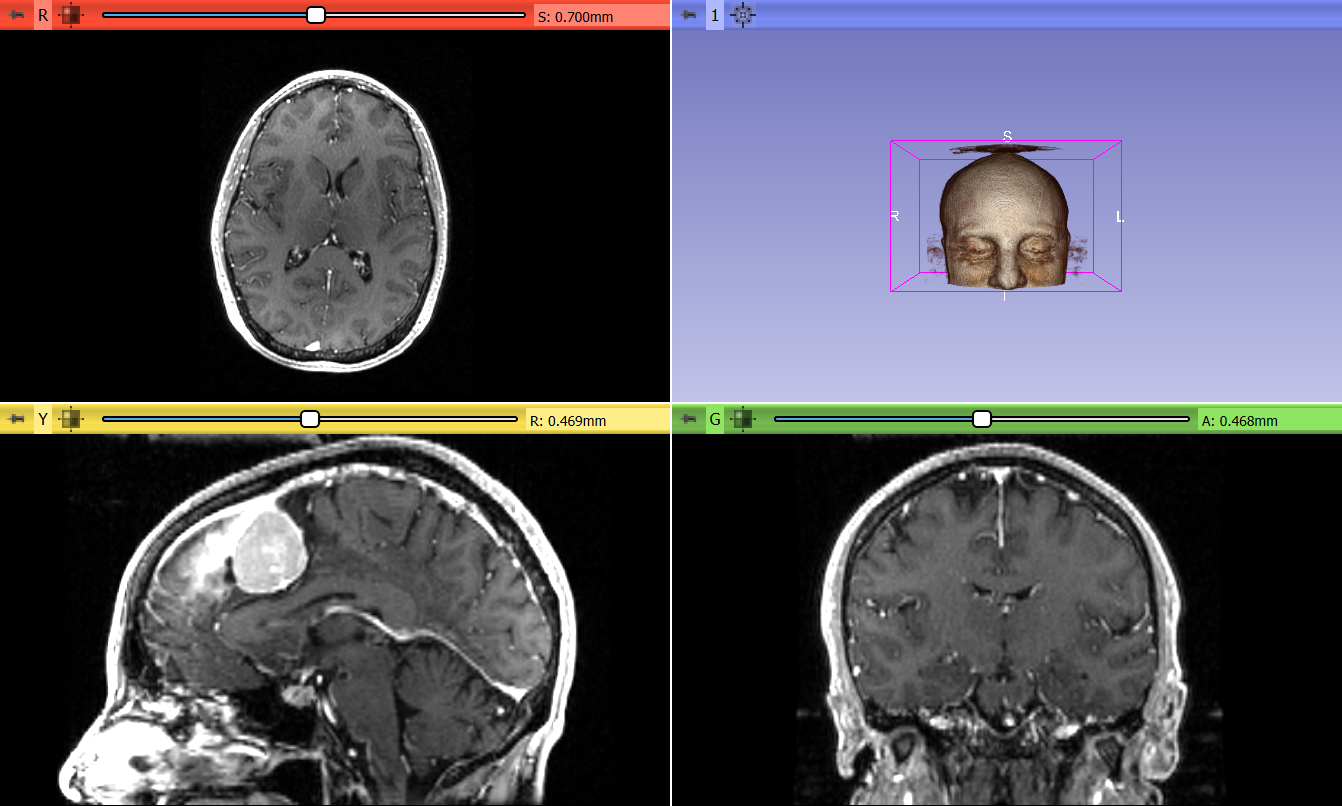

In [2]:
volumeNode = su.PushVolumeToSlicer(image)

# Show image slices and volume rendering
slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutFourUpView)
# Set up slice views
slicer.util.setSliceViewerLayers(background=volumeNode, fit=True)
# Set up volume rendering
displayNode = slicer.modules.volumerendering.logic().CreateDefaultVolumeRenderingNodes(volumeNode)
displayNode.GetVolumePropertyNode().Copy(slicer.modules.volumerendering.logic().GetPresetByName('MR-Default'))
slicer.util.resetThreeDViews()
# Show image
display()

### Process image and show results

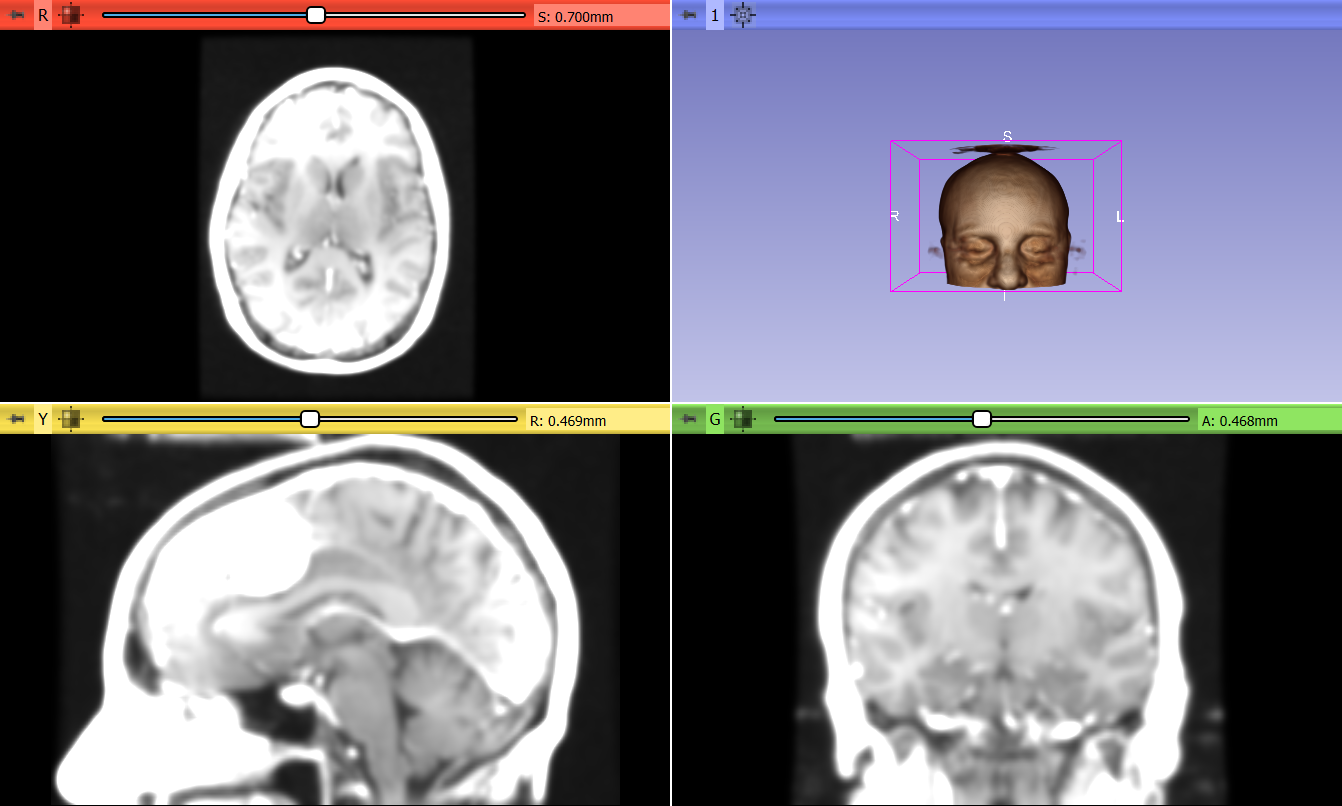

In [3]:
blurFilter = sitk.SmoothingRecursiveGaussianImageFilter()
blurFilter.SetSigma(1.5)
blurredImage = blurFilter.Execute(image)

#blurFilter = sitk.CurvatureFlowImageFilter()
#blurFilter.SetNumberOfIterations( 5 )
#blurFilter.SetTimeStep( 0.15 )
#blurredImage = blurFilter.Execute( image )

su.PushVolumeToSlicer(blurredImage, targetNode=volumeNode)

# Display views
display()

#### Run this example in your browser using Binder: [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Slicer/SlicerNotebooks/master?filepath=02_Image_Processing_using_SimpleITK.ipynb)